# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow/pytorch operations and basic numpy operations are allowed**
*Special Exception for this Lab-04. \\
  a) "for" loops is not allowed.  \\
  b) you have to use np.interp(), np.cumsum(), np.arange(), cv2.LUT() to replace "for" loop in your logic. \\
  c) Code with "for" loop based solution will be heavily penalized (more than 50%).


In [31]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Image Size is (400, 600)


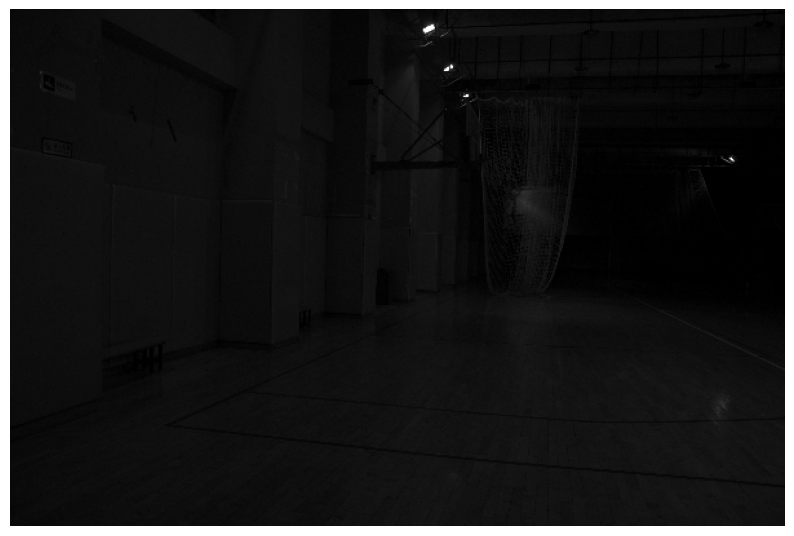

In [32]:
img = cv.imread('/content/BasketBallCourt01_low-gray.png',cv.IMREAD_GRAYSCALE)
print('Image Size is {}'.format(img.shape))
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

Image Size is (400, 600)


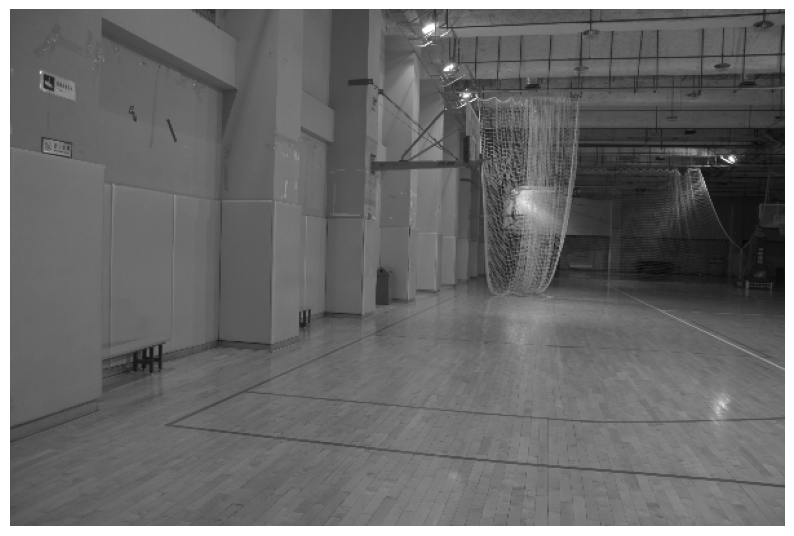

In [33]:
img_GT = cv.imread('/content/BasketBallCourt01_high-gray.png',cv.IMREAD_GRAYSCALE)
print('Image Size is {}'.format(img_GT.shape))
plt.figure(figsize=(10,10))
plt.imshow(img_GT, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [34]:
img.dtype

dtype('uint8')

# Calculate Histogram (GIVEN)

In [35]:
img_flat = img.ravel()
# img_flat = img_flat[img_flat < 255.0]
hist,bins = np.histogram(img_flat,256,[0,256])

<BarContainer object of 256 artists>

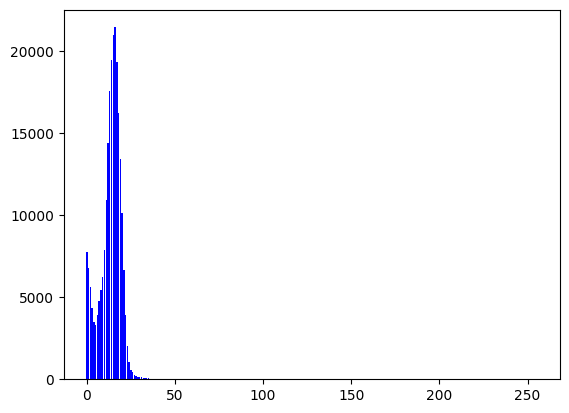

In [36]:
plt.bar(bins[:-1],hist,color='b')

In [37]:
print(bins)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [38]:
print(hist)

[ 7773  6767  5625  4374  3474  3299  3917  4779  5447  6219  7909 10939
 14396 17554 19498 21003 21471 19371 16230 13441 10153  6695  3935  2054
  1066   595   423   285   225   158   135   116    76    74    48    50
    43    34    27    35    18    25    27    14    12    12    18     8
     5     4     5     5     5     5     2     1     3     3     1     3
     1     2     3     4     1     0     0     3     1     1     0     0
     0     0     2     3     0     3     2     1     2     1     0     0
     4     1     2     0     0     1     0     1     0     0     0     0
     0     1     0     0     0     1     0     2     0     0     1     0
     1     0     0     0     0     0     0     0     0     0     0     1
     1     1     0     0     0     0     0     0     0     0     1     0
     1     0     1     0     0     0     1     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     1     0     0     0     0     0   

#Q1) a) Calculate pmf of Histogram store it in 'hist_pmf'. [2 Marks]
#b) Calculate cdf of that pmf and store it in 'hist_cdf'. [1 Marks]

In [39]:
hist_pmf = hist / np.sum(hist)

hist_cdf = np.cumsum(hist_pmf)


#Q2) Calculate/Implement Histogram equilization transformation function $T(r)$ [3 Marks]

In [49]:
def create_transformation_lookup(hist, bins):

  cdf = np.cumsum(hist)
  cdf_normalized = cdf / float(cdf[-1])
  T_r = np.interp(np.arange(256), bins[:-1], cdf_normalized) * 255
  return T_r.astype(np.uint8)

def apply_transformation(image, transformation_lookup):

 return cv.LUT(image, transformation_lookup)

def apply_transformation_to_image(img, hist, bins):
  transformation_lookup = create_transformation_lookup(hist, bins)
  return apply_transformation(img, transformation_lookup)

hist, bins = np.histogram(img.flatten(), bins=256, range=(0, 256))
T_r = create_transformation_lookup(hist, bins)
equalized_image = apply_transformation(img, T_r)


#Q3) Apply $T(r)$ on input image. [2 Marks]
#Store output image in 'out_img1'

In [46]:
hist, bins = np.histogram(img.flatten(), bins=256, range=(0, 256))
out_img1 = apply_transformation_to_image(img, hist, bins)



#Show input image and output images.

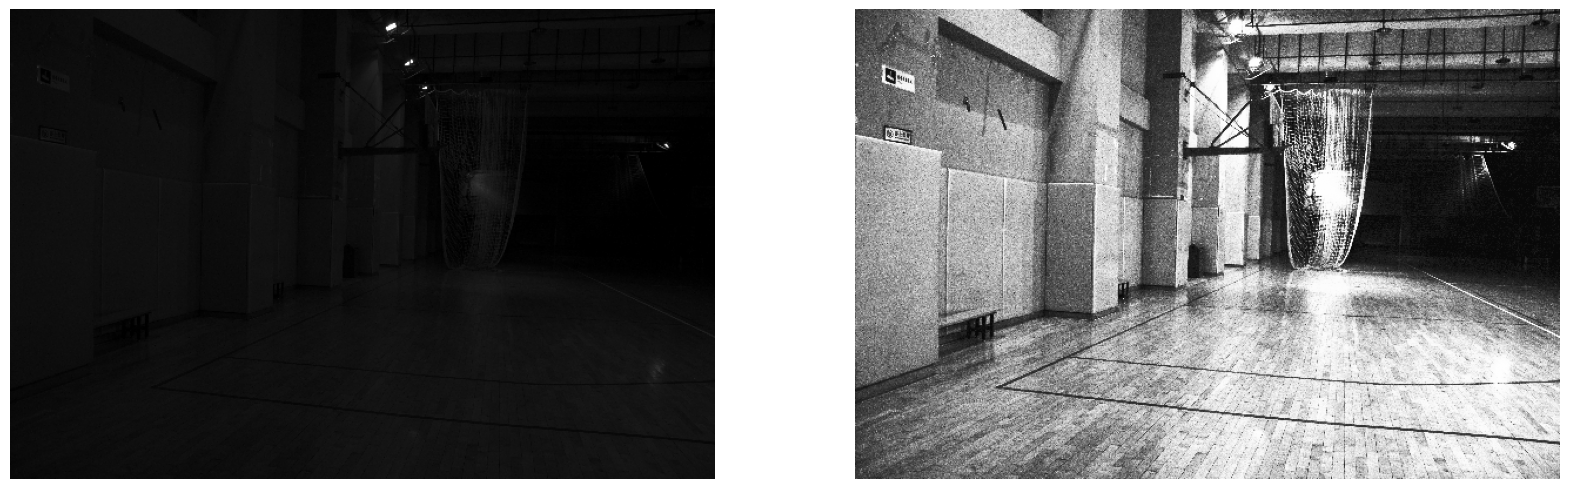

In [47]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(out_img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#Q4)calculate its root mean squared error (RMSE) with $img\_GT$ [2 Marks]

In [48]:
def rmse(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  return np.sqrt(mse)

rmse_val = rmse(out_img1, img_GT)
print(f"RMSE: {rmse_val}")


RMSE: 10.285836742822628
